## Assignment 1: due June 14.
In your favorite programming language, write code to generate a random network consisting of 1,000 nodes and at least 10,000 edges. Save the network as an edge list, a METIS file, and in GraphML format. Plot the degree distribution. Report the number of isolated nodes and connected components. Your code should accompany your write up along with the three data files (edge list as tsv, METIS, GraphML). Thus, you could just upload a folder in here that is appropriately named. Code can be reported as a link to a Github repo. Assignments should be written up using LaTeX and saved as a PDF. 

## OUTLINE

This Notebook contains many different ways to generate a graph. It is structured in the following manner:


1 - Python code that connects two nodes at random using a random index generator.


2 - Using the networkx python library, 2 graphs are generated, one using the `random_regular_graph` function and the other the `random_geometric_graph`.


3 - Using the networkit python library, a graoh is generated us

At the end of each section, there is a visualization of the degree distribution and the overall network, along with the number of connected components and singleton nodes.

## PYTHON

This is a basic manner of constructing an edge list. A list of nodes is created, a number of edges is set and the connections are made randomly. 

The methos is structured in such a way as to prevent self loops and duplicate edges.

In [154]:
import numpy as np
import pandas as pd
import csv

This is where the nodes are created. For this experiment, 1000 nodes were created.

In [155]:
nodes = [str(i) for i in range(1,1001)]

len(nodes)

1000

This is necessary for organizing the edge pair.

In [156]:
# gotten from here: https://stackoverflow.com/questions/38555385/removing-duplicate-edges-from-graph-in-python-list

def normalize(edge):
    n1, n2 = edge
    if n1 > n2: 
        n1, n2 = n2, n1
    return (n1, n2)

This is where the `edge_list` and `edge_map` are made. The first is necessary for the creation of the ´tsv´ file, the latter helps when creating the METIS file.

In [157]:
# empty list
edge_list = []

# already initialized with an empty list for all noes
edge_map = {i:[] for i in nodes}

# defining the number of edges
n_edges = 15000


def populate_edge_list(n, edge_list, nodes):

    # n is the number of edges to be appended to the edge_list and edge_map
    for _ in range(n):

        # two random indexes
        from_node = np.random.randint(0,len(nodes))
        to_node = np.random.randint(0,len(nodes))

        # there can be no self loops
        while from_node == to_node:
            to_node = np.random.randint(0,len(nodes))

        # reorders the nodes to always be sorted, this prevents duplicate edges down the line
        from_node, to_node = normalize((nodes[from_node], nodes[to_node]))
        
        # appends the edge pair to the edge list
        edge_list.append((from_node, to_node))

        # only puts the connection in the edge_map if it does no exist
        if to_node not in edge_map[from_node]:
            edge_map[from_node].append(to_node)
    


while len(edge_list) < n_edges:

    # always populates the exact amount needed to complete the number of edges
    populate_edge_list(n_edges - len(edge_list), edge_list, nodes)

    # gets rid of duplicate edges
    edge_list = list(set(edge_list))

len(edge_list)

15000

#### File Outputs

In [158]:
# gotten from here: https://stackoverflow.com/questions/63107145/writing-to-a-tsv-file-from-multiple-list-in-python


# writed the edge list on to a tsv file
with open('data/Python/EdgeList/output.tsv', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow([f'# Nodes: {len(nodes)} Edges: {n_edges}'])
    tsv_output.writerow(['# from_node, to_node'])
    for from_node, to_node in edge_list:
        tsv_output.writerow([f"{from_node} {to_node}"])


# writed the METIS file using the edge_map
with open('data/Python/METIS//data.metis', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow([f'{len(nodes)} {n_edges}'])
    for node in nodes:
        line = " ".join(edge_map[node])
        if len(line)>1:
            tsv_output.writerow([line])



In [159]:
import networkx as nx 

G = nx.read_edgelist("./data/Python/EdgeList/output.tsv", nodetype=int)

In [160]:
nx.write_graphml(G, "./data/Python/GraphML/ArtifitialGraph.xml")

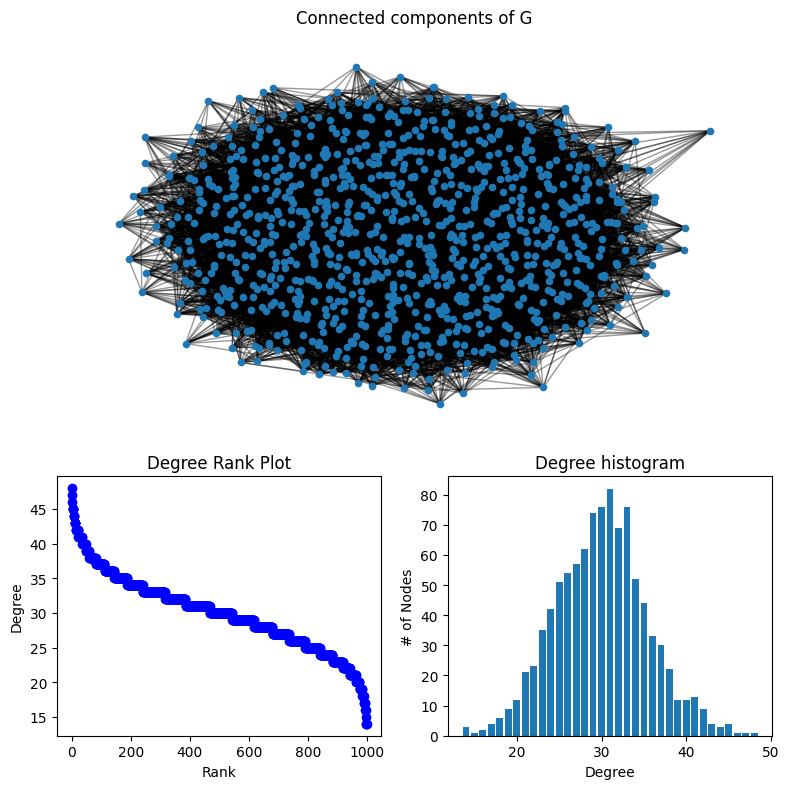

In [161]:
# source: https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html

import matplotlib.pyplot as plt


degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [162]:
nx.number_connected_components(G), nx.number_of_isolates(G)

(1, 0)

## NETWORKX

For these examples, we will be using the networkx python library, which has several graph creation functions.

The ones used are:

- `random_regular_graph`

- `random_geometric_graph`

- `barabasi_albert_graph`

In [163]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Random Regular Graph

This creates a graph where each node has the same degree, or the same number of neighbors.

The resulting graph has no self-loops or parallel edges.

Its documentation can be found [here](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.random_regular_graph.html#random-regular-graph)

In [164]:
regG = nx.random_regular_graph(20, 1000, seed=42)

print("Number of Nodes:", regG.number_of_nodes())

print("Number of Edges:", regG.number_of_edges())

Number of Nodes: 1000
Number of Edges: 10000


Edge List Creation

In [165]:
nx.write_edgelist(regG, "./data/nx/EdgeList/RegularGraph.tsv")

Metis File Creation

In [166]:
# gotten from here: https://stackoverflow.com/questions/63107145/writing-to-a-tsv-file-from-multiple-list-in-python


# writed the METIS file using the edge_map
with open('data/nx/METIS/regularGraphData.metis', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow([f'{nx.number_of_nodes(regG)} {nx.number_of_edges(regG)}'])
    for node in regG.nodes:
        edges = regG.edges(node)
        edges = list(map(lambda x: str(x[1]), edges))
        line = " ".join(edges)
        tsv_output.writerow([line])


GraphML File Creation

In [167]:
nx.write_graphml(regG, "./data/nx/GraphML/RegularGraph.xml")

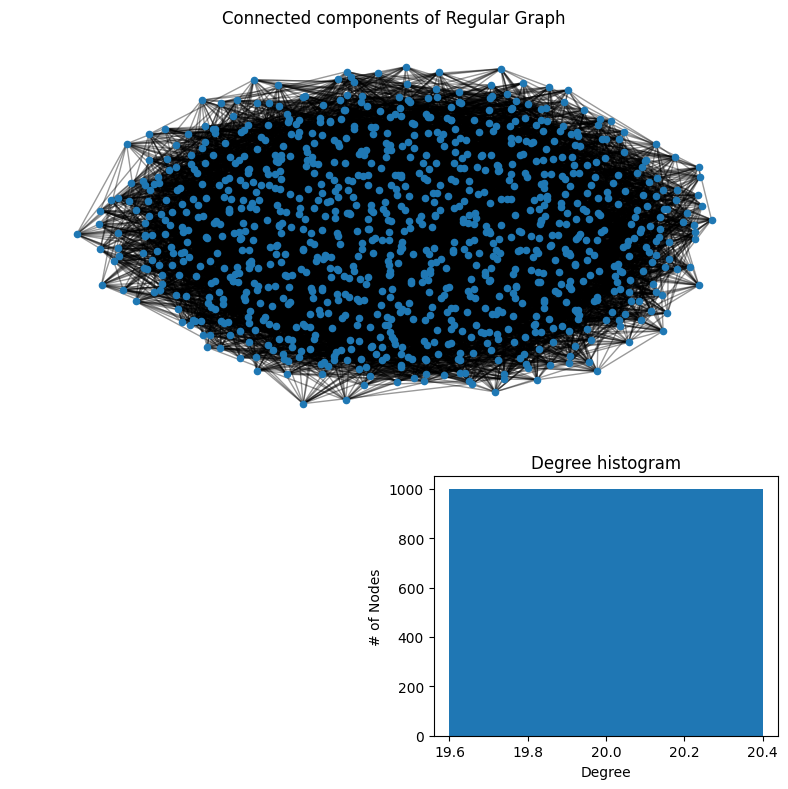

In [168]:
# source: https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html


degree_sequence = sorted((d for n, d in regG.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = regG.subgraph(sorted(nx.connected_components(regG), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of Regular Graph")
ax0.set_axis_off()


ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()

plt.show()

In [169]:
print("Number of Connected Components:", nx.number_connected_components(regG))
print("Number of Isolated Nodes:", nx.number_of_isolates(regG))


Number of Connected Components: 1
Number of Isolated Nodes: 0


### Random Geometric Graph

Returns a random geometric graph in the unit cube of dimensions, that is set by the ´dim´ parameter.

The random geometric graph model places `n` nodes uniformly at random in the unit cube. Two nodes are joined by an edge if the distance between the nodes is at most `radius`.

Its documentation can be found [here](https://networkx.org/documentation/stable/reference/generated/networkx.generators.geometric.random_geometric_graph.html)

In [170]:
rgeoG = nx.random_geometric_graph(1000, 0.125, seed=42)

print("Number of Nodes:", rgeoG.number_of_nodes())

print("Number of Edges:", rgeoG.number_of_edges())

Number of Nodes: 1000
Number of Edges: 21917


Edge List Creation

In [171]:
nx.write_edgelist(rgeoG, "./data/nx/EdgeList/GeometricGraph.tsv")

Metis File Creation

In [172]:
# gotten from here: https://stackoverflow.com/questions/63107145/writing-to-a-tsv-file-from-multiple-list-in-python


# writed the METIS file using the edge_map
with open('data/nx/METIS/randomGeometricData.metis', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow([f'{nx.number_of_nodes(rgeoG)} {nx.number_of_edges(rgeoG)}'])
    for node in rgeoG.nodes:
        edges = rgeoG.edges(node)
        edges = list(map(lambda x: str(x[1]), edges))
        line = " ".join(edges)
        tsv_output.writerow([line])


GraphML File Creation

In [173]:
# For this specific graph, we need to convert any list attributes of nodes to comma-separated strings for some reason
# This is only a problem for the random geometric graph

for node, data in rgeoG.nodes(data=True):
    for key, value in data.items():
        if isinstance(value, list):
            data[key] = ','.join(map(str, value))

nx.write_graphml(rgeoG, "./data/nx/GraphML/GeometricGraph.xml")

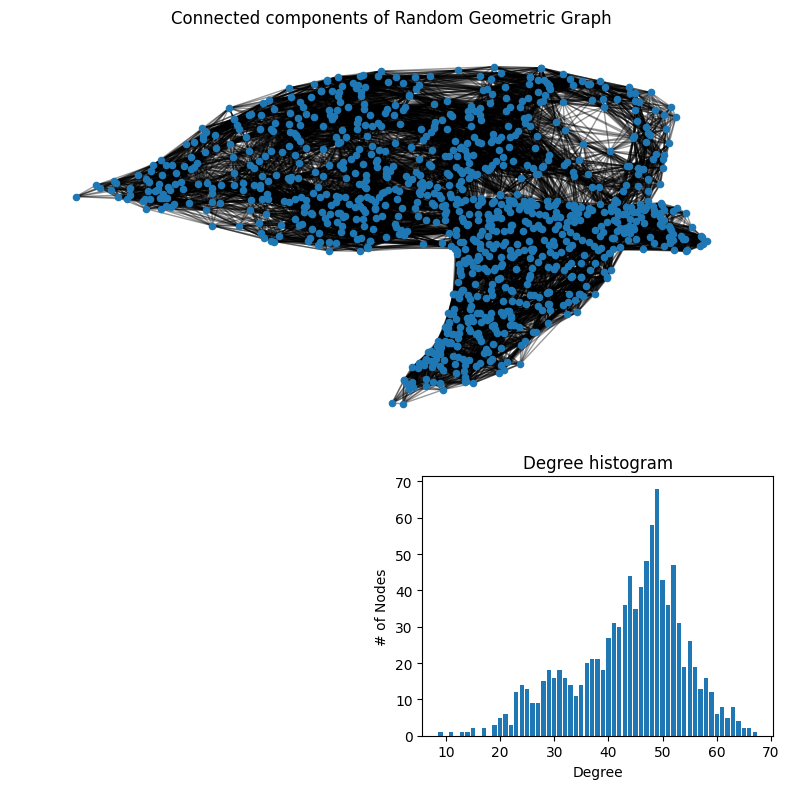

In [174]:
# source: https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html


degree_sequence = sorted((d for n, d in rgeoG.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = rgeoG.subgraph(sorted(nx.connected_components(rgeoG), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of Random Geometric Graph")
ax0.set_axis_off()

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()

plt.show()

In [175]:
print("Number of Connected Components:", nx.number_connected_components(rgeoG))
print("Number of Isolated Nodes:", nx.number_of_isolates(rgeoG))

Number of Connected Components: 1
Number of Isolated Nodes: 0


### Barabasi-Albert Method

Returns a random graph using Barabási–Albert preferential attachment

A graph of $n$ nodes is grown by attaching new nodes each with $m$ edges that are preferentially attached to existing nodes with high degree. That is the preferential attachment method.

In [176]:
baralG = nx.barabasi_albert_graph(1000, 10, seed=42)

print("Number of Nodes:", baralG.number_of_nodes())

print("Number of Edges:", baralG.number_of_edges())

Number of Nodes: 1000
Number of Edges: 9900


Edge List File Creation

In [177]:
nx.write_edgelist(baralG, "./data/nx/EdgeList/BarabasiAlbertGraph.tsv")

METIS File Creation

In [178]:
# gotten from here: https://stackoverflow.com/questions/63107145/writing-to-a-tsv-file-from-multiple-list-in-python


# writed the METIS file using the edge_map
with open('data/nx/METIS/barabasiAlbertData.metis', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow([f'{nx.number_of_nodes(baralG)} {nx.number_of_edges(baralG)}'])
    for node in baralG.nodes:
        edges = baralG.edges(node)
        edges = list(map(lambda x: str(x[1]), edges))
        line = " ".join(edges)
        tsv_output.writerow([line])

GraphML File Creation

In [179]:
nx.write_graphml(baralG, "./data/nx/GraphML/BarabasiAlbertGraph.xml")

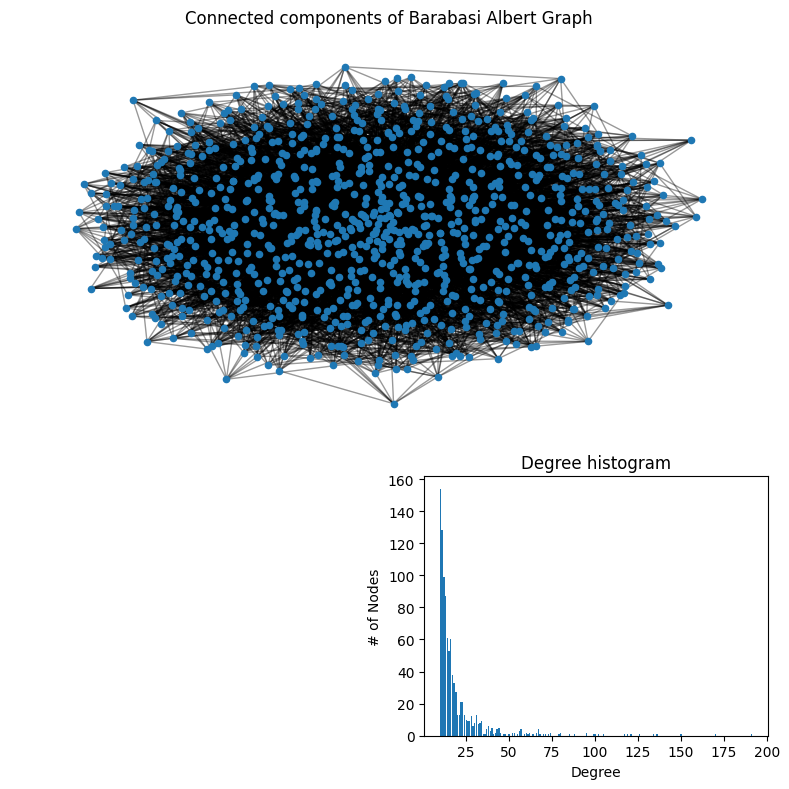

In [180]:
# source: https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html


degree_sequence = sorted((d for n, d in baralG.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = baralG.subgraph(sorted(nx.connected_components(baralG), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of Barabasi Albert Graph")
ax0.set_axis_off()


ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()

plt.show()

In [181]:
print("Number of Connected Components:", nx.number_connected_components(baralG))
print("Number of Isolated Nodes:", nx.number_of_isolates(baralG))

Number of Connected Components: 1
Number of Isolated Nodes: 0


### NETWORKIT

For these examples, we will be using the networkit python library, which has several graph creation functions.

The ones used are:

- `ErdosRenyiGenerator`

- `RmatGenerator`

- `BarabasiAlbertGenerator`

- `LFRGenerator`


Every generator can be found in [here](https://networkit.github.io/dev-docs/notebooks/Generators.html), as [that](https://networkit.github.io/dev-docs/notebooks/Generators.html) is their general documentation.

In [182]:
import networkit as nk

### Erdos Renyi

Returns a random graph using Erdos-Renyi method.

A graph is constructed by connecting labeled nodes randomly. Each edge is included in the graph with probability $p$, independently from every other edge. Equivalently, the probability for generating each graph that has $n$ nodes and $M$ edges is 

In [183]:
# Initalize algorithm
erg = nk.generators.ErdosRenyiGenerator(
    1000, # number of nodes
    0.025 # probability that an edge exists
    )

# Run algorithm
ergG = erg.generate()

In [184]:
# Verify
print(ergG.numberOfNodes(), ergG.numberOfEdges())

1000 12585


Edge List Creation

In [185]:
nk.writeGraph(ergG, "./data/nk/EdgeList/ErdosRenyi.tsv", nk.Format.EdgeListTabOne)

Metis File Creation

In [186]:
nk.writeGraph(ergG, "./data/nk/METIS/ErdosRenyi.metis", nk.Format.METIS)

GraphML File Creation

In [187]:
nk.writeGraph(ergG,"./data/nk/GraphML/ErdosRenyi.xml", nk.Format.GraphML)

Overview of the Graph

In [188]:
nk.overview(ergG)

Network Properties:
nodes, edges			1000, 12585
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.025195
clustering coefficient		0.026426
min/max/avg degree		12, 42, 25.170000
degree assortativity		-0.012515
number of connected components	1
size of largest component	1000 (100.00 %)


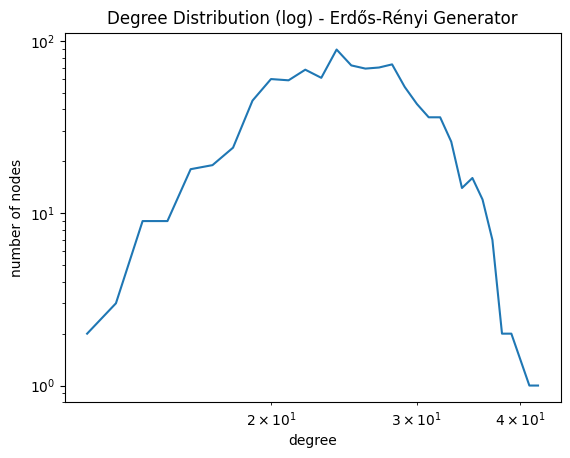

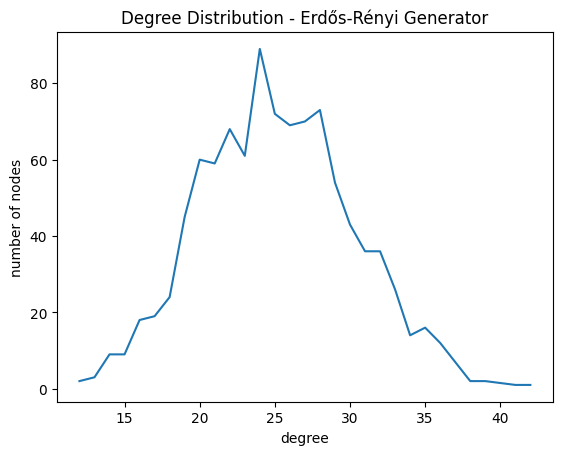

In [189]:
# gotten from here: https://github.com/networkit/networkit/blob/master/notebooks/User-Guide.ipynb

import numpy
dd = sorted(nk.centrality.DegreeCentrality(ergG).run().scores(), reverse=True)
degrees, numberOfNodes = numpy.unique(dd, return_counts=True)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.title("Degree Distribution (log) - Erdős-Rényi Generator")
plt.plot(degrees, numberOfNodes)
plt.show()

dd = sorted(nk.centrality.DegreeCentrality(ergG).run().scores(), reverse=True)
degrees, numberOfNodes = numpy.unique(dd, return_counts=True)
plt.xlabel("degree")
plt.ylabel("number of nodes")
plt.title("Degree Distribution - Erdős-Rényi Generator")
plt.plot(degrees, numberOfNodes)
plt.show()

### Recursive Matrix Method

Returns a random graph using Recursive Matrix method.

The Rmat generator generates static R-MAT (Recursive MATrix) graphs by operating on the graph’s adjacency matrix in a recursive manner.

In [190]:
# Initalize algorithm
rmat = nk.generators.RmatGenerator(
    10, # scale - the number of nodes (n) is calculated using: n = 2^scale
    10, # edgeFactor - the number of edges (m)is calculated using: m = n * edgeFactor
    0.1, # probability that an edge is in the top left side of the matrix
    0.2, # probability that an edge is in the top right side of the matrix
    0.5, # probability that an edge is in the lower left side of the matrix
    0.2  # probability that an edge is in the lower right side of the matrix
    )

# Run the algorithm
rmatG = rmat.generate()

In [191]:
# Verify
print(rmatG.numberOfNodes(), rmatG.numberOfEdges())

1024 10240


Edge List Creation

In [192]:
nk.writeGraph(rmatG, "./data/nk/EdgeList/RMAT.tsv", nk.Format.EdgeListTabOne)

METIS File Creation

In [193]:
nk.writeGraph(rmatG, "./data/nk/METIS/RMAT.metis", nk.Format.METIS)

GraphML File Creation

In [194]:
nk.writeGraph(rmatG, "./data/nk/GraphML/RMAT.xml", nk.Format.GraphML)

Overview of the Graph

In [195]:
nk.overview(rmatG)

Network Properties:
nodes, edges			1024, 10240
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.019550
clustering coefficient		0.015929
min/max/avg degree		5, 204, 20.000000
degree assortativity		-0.088481
number of connected components	1
size of largest component	1024 (100.00 %)


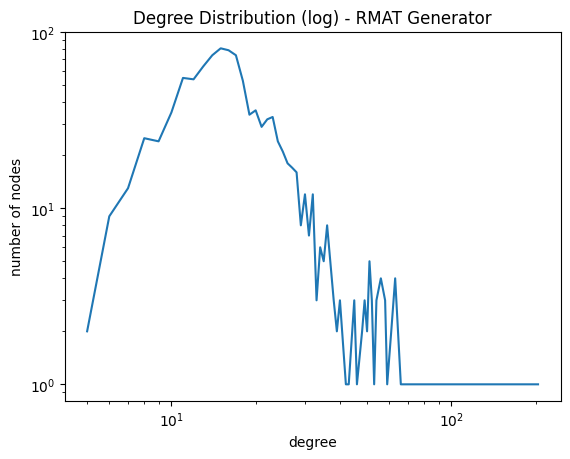

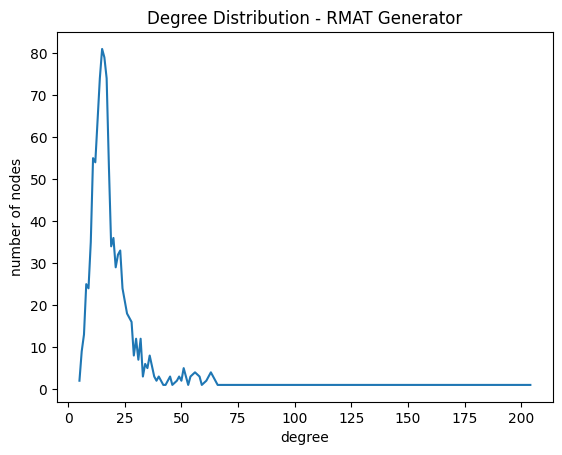

In [196]:
# gotten from here: https://github.com/networkit/networkit/blob/master/notebooks/User-Guide.ipynb

import numpy
dd = sorted(nk.centrality.DegreeCentrality(rmatG).run().scores(), reverse=True)
degrees, numberOfNodes = numpy.unique(dd, return_counts=True)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(degrees, numberOfNodes)
plt.title("Degree Distribution (log) - RMAT Generator")
plt.show()

dd = sorted(nk.centrality.DegreeCentrality(rmatG).run().scores(), reverse=True)
degrees, numberOfNodes = numpy.unique(dd, return_counts=True)
plt.xlabel("degree")
plt.ylabel("number of nodes")
plt.plot(degrees, numberOfNodes)
plt.title("Degree Distribution - RMAT Generator")
plt.show()

### Barabasi-Albert Method

Returns a random graph using Barabási–Albert preferential attachment

A graph of $n$ nodes is grown by attaching new nodes each with $m$ edges that are preferentially attached to existing nodes with high degree. That is the preferential attachment method.

In [197]:
# Initalize algorithm
bag = nk.generators.BarabasiAlbertGenerator(10, 1000)

# Run algorithm
bagG = bag.generate()

In [198]:
# Verify
print(bagG.numberOfNodes(), bagG.numberOfEdges())

1000 9910


Edge List Creation

In [199]:
nk.writeGraph(bagG, "./data/nk/EdgeList/BarabasiAlbert.tsv", nk.Format.EdgeListTabOne)

METIS File Creation

In [200]:
nk.writeGraph(bagG, "./data/nk/METIS/BarabasiAlbert.metis", nk.Format.METIS)

GraphML File Creation

In [201]:
nk.writeGraph(bagG, "./data/nk/GraphML/BarabasiAlbert.xml", nk.Format.GraphML)

Overview of the Graph

In [202]:
nk.overview(bagG)

Network Properties:
nodes, edges			1000, 9910
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.019840
clustering coefficient		0.063667
min/max/avg degree		10, 191, 19.820000
degree assortativity		0.323206
number of connected components	1
size of largest component	1000 (100.00 %)


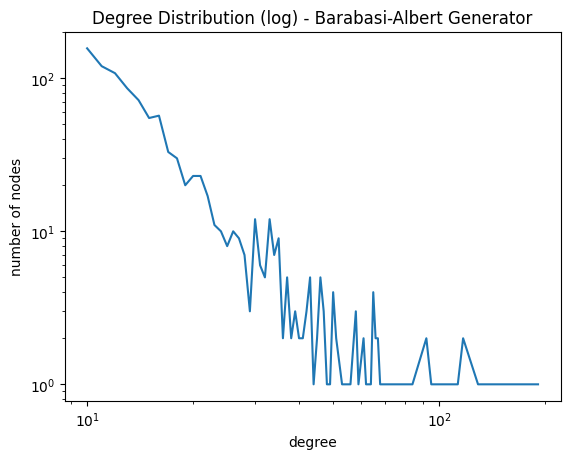

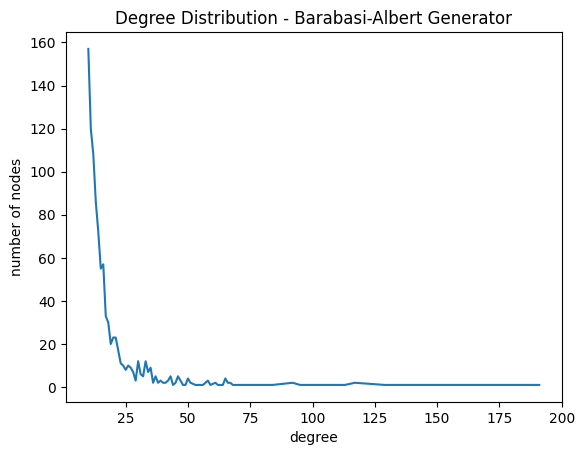

In [203]:
# gotten from here: https://github.com/networkit/networkit/blob/master/notebooks/User-Guide.ipynb

import numpy
dd = sorted(nk.centrality.DegreeCentrality(bagG).run().scores(), reverse=True)
degrees, numberOfNodes = numpy.unique(dd, return_counts=True)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(degrees, numberOfNodes)
plt.title("Degree Distribution (log) - Barabasi-Albert Generator")
plt.show()

dd = sorted(nk.centrality.DegreeCentrality(bagG).run().scores(), reverse=True)
degrees, numberOfNodes = numpy.unique(dd, return_counts=True)
plt.xlabel("degree")
plt.ylabel("number of nodes")
plt.plot(degrees, numberOfNodes)
plt.title("Degree Distribution - Barabasi-Albert Generator")
plt.show()

### LFR Method

LFR benchmark is an algorithm that generates benchmark networks. The node degrees are distributed according to a power law with different exponents.

The node degrees and the community sizes are distributed according to a power law, with different exponents.

The power law is a relationship between two quantities, where one quantity varies as a power of another.

In [204]:
# Initalize algorithm
lfr = nk.generators.LFRGenerator(1000)

# Generate sequences
lfr.generatePowerlawDegreeSequence(20, 50, -2)
lfr.generatePowerlawCommunitySizeSequence(10, 50, -1)
lfr.setMu(0.5)

# Run algorithm
lfrG = lfr.generate()

In [205]:
# Verify
print(lfrG.numberOfNodes(), lfrG.numberOfEdges())

1000 9870


Edge List File Creation

In [206]:
nk.writeGraph(lfrG, "./data/nk/EdgeList/LFR.tsv", nk.Format.EdgeListTabOne)

METIS File Creation

In [207]:
nk.writeGraph(lfrG, "./data/nk/METIS/LFR.metis", nk.Format.METIS)

GraphML File Creation

In [208]:
nk.writeGraph(lfrG, "./data/nk/GraphML/LFR.xml", nk.Format.GraphML)

Overview of the Graph

In [209]:
nk.overview(lfrG)

Network Properties:
nodes, edges			1000, 9870
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.019760
clustering coefficient		0.133495
min/max/avg degree		10, 50, 19.740000
degree assortativity		-0.056186
number of connected components	1
size of largest component	1000 (100.00 %)


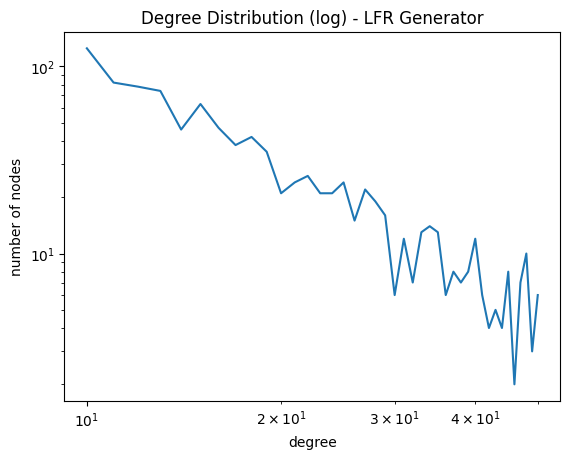

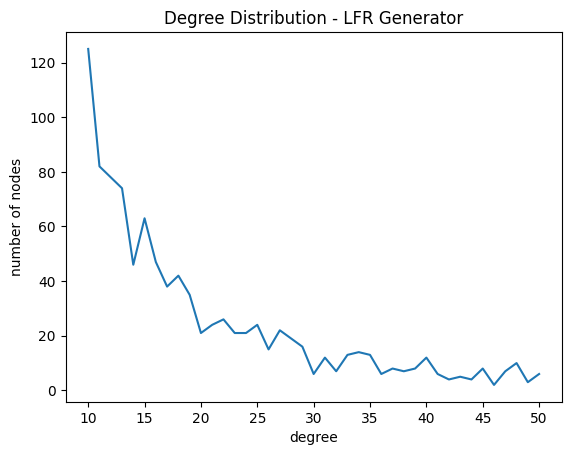

In [210]:
# gotten from here: https://github.com/networkit/networkit/blob/master/notebooks/User-Guide.ipynb

import numpy
dd = sorted(nk.centrality.DegreeCentrality(lfrG).run().scores(), reverse=True)
degrees, numberOfNodes = numpy.unique(dd, return_counts=True)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.plot(degrees, numberOfNodes)
plt.title("Degree Distribution (log) - LFR Generator")
plt.show()

dd = sorted(nk.centrality.DegreeCentrality(lfrG).run().scores(), reverse=True)
degrees, numberOfNodes = numpy.unique(dd, return_counts=True)
plt.xlabel("degree")
plt.ylabel("number of nodes")
plt.plot(degrees, numberOfNodes)
plt.title("Degree Distribution - LFR Generator")
plt.show()